# Logistic Regression

In [157]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [158]:
# Load data
data = pd.read_csv("data/Algerian_forest_fires_dataset_CLEANED.csv")
# Drop the first messy column
data = data.drop(['Unnamed: 0'], axis=1)

We build a logistic regression model to predict whether or not a combination of weather features will produce a forest fire.

## Data Preprocessing

We first examine the correlation matrix of the weather metrics in our dataset. We find that DMC, DC, and BUI and highly correlated with one another. To avoid multicollinearity, we remove DC and BUI from our feature set. We choose to use DMC becuase it is the least correlated with the remaining features.

In [164]:
# Examine correlation matrix
data.iloc[:, 3:-2].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


We preprocess the data by removing the 'year' column because there is only one value for the entire dataset. We also remove the DC and BUI columns. We encode 'Regions' in the feature matrix and 'Classes' in the y vector to binary representations. Lastly, we normalize the weather metrics in the feature matrix. 

In [145]:
def preprocess_data(data):
    y = data['Classes'].values
    X = data.drop(['Classes', 'year', 'DC', 'BUI'], axis=1)
    
    # One hot encode categorial variables
    X['Region'].loc[X['Region'] == 'Bejaia'] = 0
    X['Region'].loc[X['Region'] == 'Sidi-Bel Abbes'] = 1
    
    y[y == "notfire"] = 0
    y[y == "fire"] = 1
    y = y.astype(int)
    
    return X, y

def normalize(data, features):
    for feat in features:
        data[feat] = (data[feat] - data[feat].mean())/data[feat].std()

X, y = preprocess_data(data)
normalize(X, ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'FWI'])


We create our training and testing datasets with an 80/20 split, respectively.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

We build a logistic regression model with Sklearn. Our penalty is L2 loss and our solver is lbfgs. 

In [151]:
clf = LogisticRegression(penalty='l2',random_state=42).fit(X_train, y_train)

### Predictions and Metrics

We use our trained model to predict on the test set and display the confusion matrix.

In [165]:
predictions = clf.predict(X_test)
confusion = confusion_matrix(predictions, y_test)

# Calculate true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = confusion_matrix(predictions, y_test).ravel()
n = len(y_test)

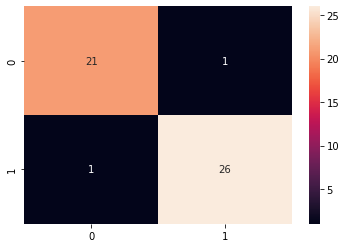

In [163]:
sns.heatmap(confusion, annot=True);
plt.savefig('figures/confusion_matrix.png')

We calculate accuracy, precision, and recall for out model. It looks like our model does well!

In [137]:
print('Accuracy: ' + str((tp+tn)/n))
print('Precision: ' + str(tp/(tp+fp)))
print('Recall: ' + str(tp/(tp+fn)))

Accuracy: 0.9591836734693877
Precision: 0.9629629629629629
Recall: 0.9629629629629629


To better evaluate our model, we examine the ROC curve. The area under the curve is close to 1. 

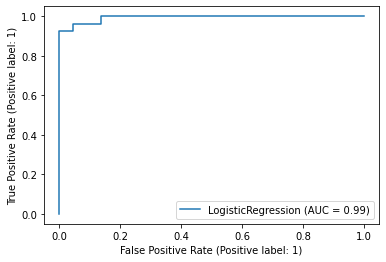

In [166]:
# Show roc curve 

plot_roc_curve(clf, X_test, y_test);
plt.savefig('figures/logistic_regression_roc.png')